In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append(r"C:\Users\yangshanqi\Documents\lab\labgithubcopy\task_1_version_2")

In [3]:
from calculation_score import cal_score
from NN_function import nn_predict_with_distance_adjust
from NN_function import nn_predict_with_distance_adjust_presion
from plot_prediction import nn_plot_prediction

In [4]:
X_scaled_FCNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_FCNN.csv")
y_scaled_FCNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_FCNN.csv")
X_scaled_CNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_CNN.csv")
y_scaled_CNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_CNN.csv")
X_scaled_kMeans=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_kMeans.csv")
y_scaled_kMeans=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_kMeans.csv")
X_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_validation_feature.csv")
y_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label.csv")
X_scaled_kMeans=X_scaled_kMeans.drop("predict_cluster",1)
y_scaled_kMeans=y_scaled_kMeans.drop("predict_cluster",1)
X_val=X_val.drop("Unnamed: 0",1)
y_val=y_val.drop("Unnamed: 0",1)

In [8]:
X_scaled=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_train_feature.csv")
y_scaled=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_label.csv")

In [6]:
input_data_amount=pd.DataFrame({"raw_only_scaled":[len(X_scaled)],"raw_scaled_kMeans":[len(X_scaled_kMeans)],"raw_scaled_CNN":[len(X_scaled_CNN)],"raw_scaled_FCNN":[len(X_scaled_FCNN)]})

In [7]:
input_data_amount.rows=['amount']

In [8]:
input_data_amount

,raw_only_scaled,raw_scaled_CNN,raw_scaled_FCNN,raw_scaled_kMeans
0,355455,86412,89524,269384


In [9]:
NN_scaled_FCNN_result=nn_predict_with_distance_adjust(X_scaled_FCNN,y_scaled_FCNN,X_val,y_val)
NN_scaled_CNN_result=nn_predict_with_distance_adjust(X_scaled_CNN,y_scaled_CNN,X_val,y_val)
NN_scaled_kMeans_result=nn_predict_with_distance_adjust(X_scaled_kMeans,y_scaled_kMeans,X_val,y_val)
NN_scaled_result=nn_predict_with_distance_adjust(X_scaled,y_scaled,X_val,y_val)

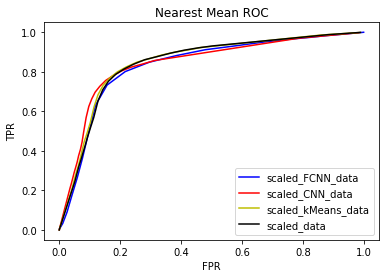

In [30]:
plt.title("Nearest Mean ROC")
plt.plot(NN_scaled_FCNN_result['FPR'],NN_scaled_FCNN_result['TPR'],"b-",label='scaled_FCNN_data')
plt.plot(NN_scaled_CNN_result['FPR'],NN_scaled_CNN_result['TPR'],"r-",label='scaled_CNN_data')
plt.plot(NN_scaled_kMeans_result['FPR'],NN_scaled_kMeans_result['TPR'],"y-",label='scaled_kMeans_data')
plt.plot(NN_scaled_result['FPR'],NN_scaled_result['TPR'],"k-",label='scaled_data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

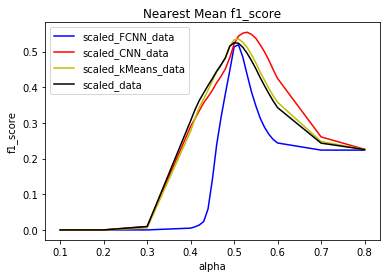

In [29]:
plt.title("Nearest Mean f1_score")
plt.plot(NN_scaled_FCNN_result['alpha'],NN_scaled_FCNN_result['f1_score'],"b-",label='scaled_FCNN_data')
plt.plot(NN_scaled_CNN_result['alpha'],NN_scaled_CNN_result['f1_score'],"r-",label='scaled_CNN_data')
plt.plot(NN_scaled_kMeans_result['alpha'],NN_scaled_kMeans_result['f1_score'],"y-",label='scaled_kMeans_data')
plt.plot(NN_scaled_result['alpha'],NN_scaled_result['f1_score'],"k-",label='scaled_data')
plt.xlabel('alpha')
plt.ylabel('f1_score')
plt.legend()
plt.show()

In [23]:
NN_scaled_CNN_result_presion=nn_predict_with_distance_adjust_presion(X_scaled_CNN,y_scaled_CNN,X_val,y_val,0.52,0.54)
NN_scaled_CNN_result_presion.loc[NN_scaled_CNN_result_presion['f1_score'].idxmax()]

alpha       0.528000
f1_score    0.555075
TPR         0.691043
FPR         0.115118
BER         0.212037
Name: 8, dtype: float64

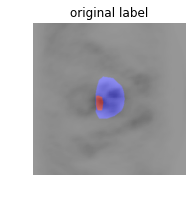

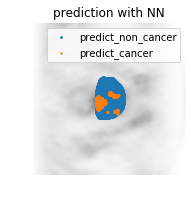

In [24]:
stuck,slices,features=11,22,3
nn_plot_prediction(stuck,slices,features,X_scaled_CNN,y_scaled_CNN,X_val,y_val,0.528000)

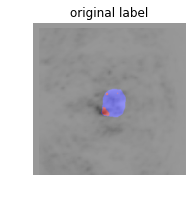

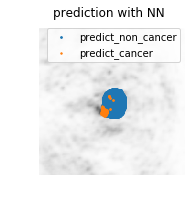

In [36]:
stuck,slices,features=12,22,3
nn_plot_prediction(stuck,slices,features,X_scaled_CNN,y_scaled_CNN,X_val,y_val,0.528000)

In [21]:
NN_scaled_FCNN_result_presion=nn_predict_with_distance_adjust_presion(X_scaled_FCNN,y_scaled_FCNN,X_val,y_val,0.50,0.52)
NN_scaled_FCNN_result_presion.loc[NN_scaled_FCNN_result_presion['f1_score'].idxmax()]

alpha       0.504000
f1_score    0.524510
TPR         0.682993
FPR         0.132763
BER         0.224885
Name: 4, dtype: float64

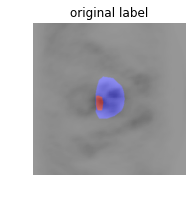

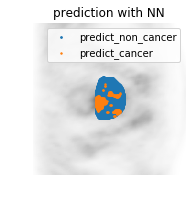

In [22]:
stuck,slices,features=11,22,3
nn_plot_prediction(stuck,slices,features,X_scaled_FCNN,y_scaled_FCNN,X_val,y_val,0.504000)

In [27]:
NN_scaled_kMeans_result_presion=nn_predict_with_distance_adjust_presion(X_scaled_kMeans,y_scaled_kMeans,X_val,y_val,0.49,0.52)
NN_scaled_kMeans_result_presion.loc[NN_scaled_kMeans_result_presion['f1_score'].idxmax()]

alpha       0.505000
f1_score    0.536740
TPR         0.710998
FPR         0.135213
BER         0.212108
Name: 15, dtype: float64

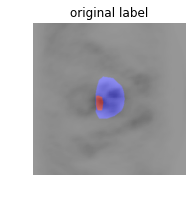

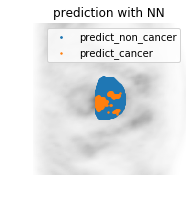

In [28]:
stuck,slices,features=11,22,3
nn_plot_prediction(stuck,slices,features,X_scaled_kMeans,y_scaled_kMeans,X_val,y_val,0.505000)

In [29]:
NN_scaled_result_presion=nn_predict_with_distance_adjust_presion(X_scaled,y_scaled,X_val,y_val,0.49,0.51)
NN_scaled_result_presion.loc[NN_scaled_result_presion['f1_score'].idxmax()]

alpha       0.504000
f1_score    0.527083
TPR         0.729819
FPR         0.149787
BER         0.209984
Name: 14, dtype: float64

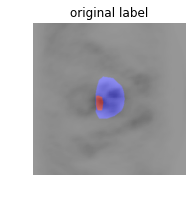

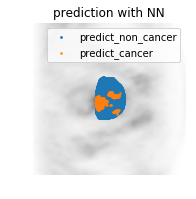

In [31]:
stuck,slices,features=11,22,3
nn_plot_prediction(stuck,slices,features,X_scaled_kMeans,y_scaled_kMeans,X_val,y_val,0.504000)